<a href="https://colab.research.google.com/github/susama2203/Machine_learning63/blob/main/Covid_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import neccessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import  Dropout, Dense,GlobalMaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras import optimizers
from sklearn.metrics import classification_report, confusion_matrix
 
from glob import glob
import cv2

# Function for plotting graph

In [2]:
def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=10)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=10)
    plt.legend()
    plt.grid(True)
    plt.show()

# Read data from Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Change to your path
mypath = '/content/gdrive/My Drive/Colab Notebooks/COVID-19 Radiography Database/'

In [5]:
filenames = glob(mypath + 'COVID-19/' + '*.png')
np.random.shuffle(filenames)
covid_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames]

In [ ]:
filenames = glob(mypath + 'NORMAL/' + '*.png')
np.random.shuffle(filenames)
normal_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:219]]

In [ ]:
filenames = glob(mypath + 'Viral Pneumonia/' + '*.png')
np.random.shuffle(filenames)
pneu_images = [cv2.resize(cv2.imread(img), (224,224)) for img in filenames[:219]]

# Convolutional Neural Network



*   0 --> Normal
*   1 --> COVID-19

In [ ]:
X = np.array(normal_images + covid_images).astype('float32')/255
Y = np.array([0] * 219 + [1] *219)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5,5), activation='relu', input_shape = (224,224,3) ))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (5,5), activation='relu' ))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr = 0.0001), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 179778    
Total params: 235,874
Trainable params: 235,874
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 52ms/step - loss: 0.5480 - accuracy: 0.6967 - val_loss: 0.3886 - val_accuracy: 0.8226
Epoch 2/30
25/25 [==============================] - 1s 37ms/step - loss: 0.2811 - accuracy: 0.8893 - val_loss: 0.2603 - val_accuracy: 0.8387
Epoch 3/30
25/25 [==============================] - 1s 37ms/step - loss: 0.2615 - accuracy: 0.8852 - val_loss: 0.4736 - val_accuracy: 0.7903
Epoch 4/30
25/25 [==============================] - 1s 37ms/step - loss: 0.1684 - accuracy: 0.9385 - val_loss: 0.1629 - val_accuracy: 0.9194
Epoch 5/30
25/25 [==============================] - 1s 38ms/step - loss: 0.1022 - accuracy: 0.9590 - val_loss: 0.1299 - val_accuracy: 0.9355
Epoch 6/30
25/25 [==============================] - 1s 37ms/step - loss: 0.0887 - accuracy: 0.9795 - val_loss: 0.1103 - val_accuracy: 0.9194
Epoch 7/30
25/25 [==============================] - 1s 38ms/step - loss: 0.0564 - accuracy: 0.9877 - val_loss: 0.1557 - val_accuracy: 0.9355
Epoch 8/30
25

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 25ms/step - loss: 0.1008 - accuracy: 0.9697


[0.10083536803722382, 0.9696969985961914]

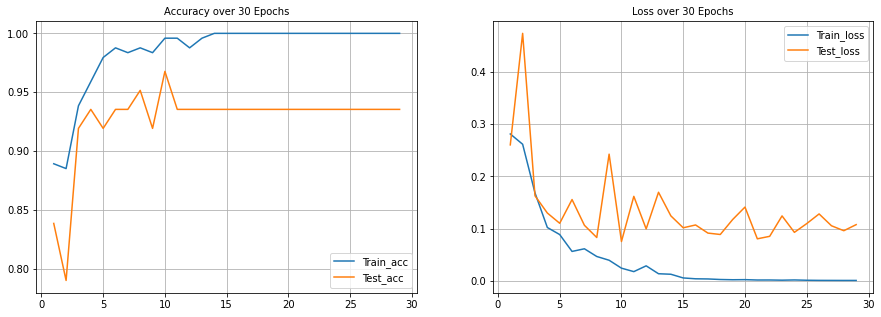

In [ ]:
plot_acc_loss(history, 30)

# Implement image classification model using pre-trained model

In [ ]:
X = np.array(normal_images + covid_images).astype('float32')/255
Y = np.array([0] * 219 + [1] *219)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
pre_trained_model = VGG16(input_shape=(224,224,3), include_top= False, weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers[:15]:
  layer.trainable = False

for layer in pre_trained_model.layers[15:]:
  layer.trainable = True

In [ ]:
last_layer  = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

In [ ]:
#temp = AveragePooling2D(pool_size=(4,4))(last_output)
temp = GlobalMaxPooling2D()(last_output)
temp = Dense(128, activation='relu')(temp)
temp = Dropout(0.2)(temp)
temp = Dense(64, activation='relu')(temp)
temp = Dropout(0.2)(temp)
temp = Dense(2, activation='softmax')(temp)

In [ ]:
model = tf.keras.models.Model(pre_trained_model.input, temp)
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(lr = 0.0001), metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
history = model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 4s 151ms/step - loss: 0.3216 - accuracy: 0.8279 - val_loss: 0.1019 - val_accuracy: 0.9516
Epoch 2/20
25/25 [==============================] - 3s 101ms/step - loss: 0.0743 - accuracy: 0.9754 - val_loss: 0.0876 - val_accuracy: 0.9677
Epoch 3/20
25/25 [==============================] - 3s 102ms/step - loss: 0.0178 - accuracy: 0.9959 - val_loss: 0.0473 - val_accuracy: 0.9839
Epoch 4/20
25/25 [==============================] - 3s 101ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9839
Epoch 5/20
25/25 [==============================] - 3s 101ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0268 - val_accuracy: 0.9839
Epoch 6/20
25/25 [==============================] - 3s 102ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9839
Epoch 7/20
25/25 [==============================] - 3s 102ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0529 - val_accuracy: 0.9839
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 1s 115ms/step - loss: 0.0742 - accuracy: 0.9848


[0.07417338341474533, 0.9848484992980957]

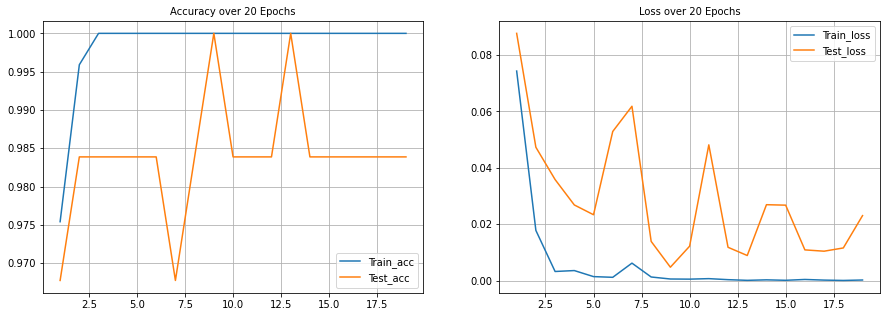

In [ ]:
plot_acc_loss(history, 20)